# Introduction

This notebook iterates through multilinear regression models, using the data from `cleaned_kc.csv`. Models are compared to the baseline R-squared value from the `eda_and_cleaning.ipynb` notebook, which was **0.692.**

## Importing Data

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import datetime  as dt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict

In [2]:
df = pd.read_csv('data/cleaned_kc.csv')

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_year
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,286
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,400.0,1951,1.0,98125,47.7210,-122.319,1690,7639,343
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,56
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,343
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,49


# Model 1: Baseline Model

The baseline model is reprinted below for reference:

In [5]:
price = df.price
indep = df.drop('price', axis = 1)

model = sm.OLS(price, indep).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     2831.
Date:                Thu, 16 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:59:14   Log-Likelihood:            -2.9228e+05
No. Observations:               21420   AIC:                         5.846e+05
Df Residuals:                   21402   BIC:                         5.847e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
id            -1.072e-06   4.91e-07     -2.182      0.029   -2.04e-06   -1.09e-07
bedrooms      -4.005e+04   1929.391    -20.757      0.000   -4.38e+04   -3.63e+04
bathrooms      4.342e+04   3320.701     13.076      0.000    3.69e+04    4.99e+04
sqft_living     178.3476      3.718     47.963      0.000     171.059     185.636
sqft_lot          0.1617      0.049      3.324      0.001       0.066       0.257
floors         1.129e+04   3585.706      3.148      0.002    4258.823    1.83e+04
waterfront     7.798e+05   1.72e+04     45.314      0.000    7.46e+05    8.14e+05
condition      2.828e+04   2369.107     11.938      0.000    2.36e+04    3.29e+04
grade           1.02e+05   2184.397     46.691      0.000    9.77e+04    1.06e+05
sqft_basement    -9.8393      4.292     -2.293      0.022     -18.252      -1.427
yr_built      -2792.8368     68.036    -41.050      0.000   -2926.192   -2659.482
renovated        5.3e+04   8064.967      6.572      0.000    3.72e+04    6.88e+04
zipcode        -516.6543     18.190    -28.403      0.000    -552.309    -481.000
lat            5.762e+05   1.09e+04     52.931      0.000    5.55e+05    5.98e+05
long          -2.294e+05   1.33e+04    -17.215      0.000   -2.56e+05   -2.03e+05
sqft_living15    34.9729      3.414     10.243      0.000      28.280      41.665
sqft_lot15       -0.3849      0.075     -5.158      0.000      -0.531      -0.239
day_of_year    -105.4953     14.773     -7.141      0.000    -134.451     -76.540
==============================================================================
Omnibus:                    18079.317   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1726653.156
Skew:                           3.541   Prob(JB):                         0.00
Kurtosis:                      46.410   Cond. No.                     6.68e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.68e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model 2: Mean Normalization of Continuous Variables

## Continuous Variables

It's time to separate categorical and continuous values. Most are fairly obvious in this dataset. As a general rule, "If the variable's numeric value makes sense intuitively, or is not 0-1 choice, it's a continuous variable." A value of 50,000 `price`, 3 `bathrooms`, or 320 `day_of_year` all make sense without explanation.

In [6]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade', 'sqft_basement',
       'yr_built', 'renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'day_of_year'],
      dtype='object')

Naturally, then, these are the continuous variables:

In [7]:
cont = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_basement', 'yr_built', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'day_of_year']

Next, let's look at the distributions of these continuous variables and determine which need to be normalized and/or log transformed:

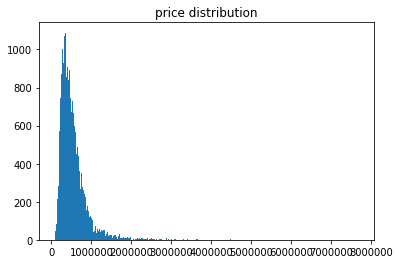

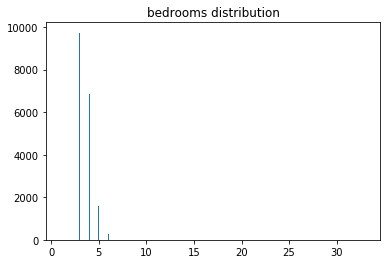

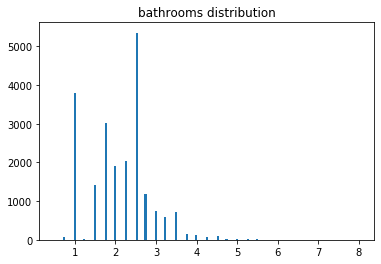

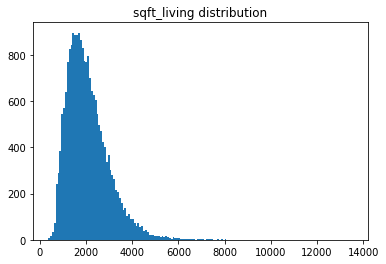

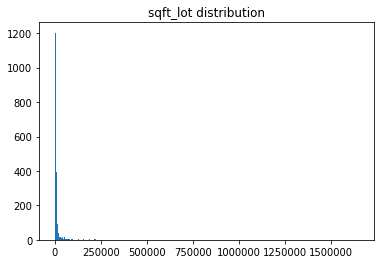

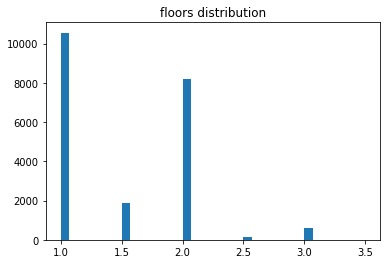

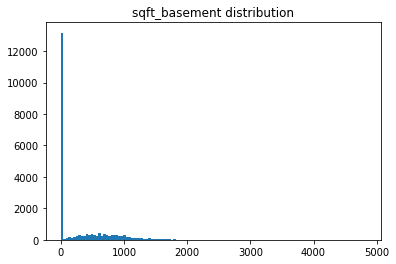

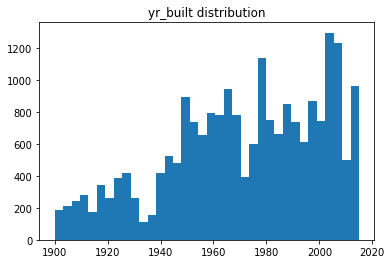

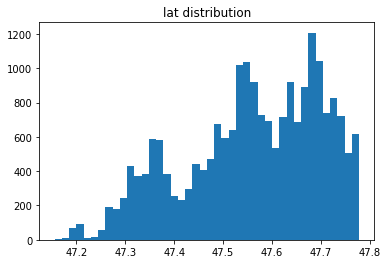

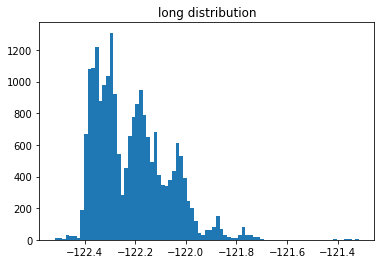

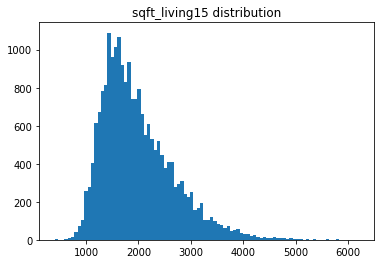

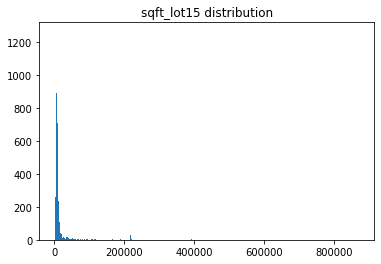

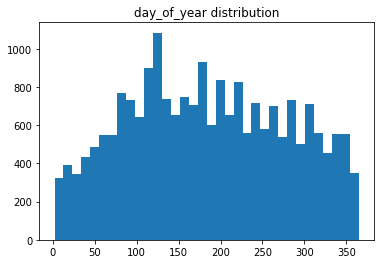

In [8]:
for col in df[cont].columns:
    plt.hist(df[col], bins='auto')
    plt.title(f'{col} distribution')
    plt.show()

A few observations:
1. Some of these columns have extreme outlier-related skews, such as `price` and `sqft_basement`.
1. The column `sqft_basement`, while continuous, should be changed to a binary column because of how many zero values there are. It makes more sense to present this as "Has or doesn't have basement" as opposed to "Size of basement, with zero being a possible size."
1. Only 3 of these columns (`price`, `sqft_living15`, and `sqft_living`) have distributions that are close to normal.

The `sqft_basement` column will be changed, and the remaining columns now will be normalized:

In [45]:
# Make a copy to do changes on
df2 = df.copy()

In [46]:
df2.loc[(df2.sqft_basement > 0), 'sqft_basement'] = 1
df2.rename({'sqft_basement' : 'has_basement'}, axis=1, inplace=True)
df2.has_basement.unique()

array([0., 1.])

In [31]:
cont.remove("sqft_basement")

ValueError: list.remove(x): x not in list

In [47]:
already_norm = ["price", "sqft_living15", "sqft_living"]
cont_to_norm = [x for x in cont if x not in already_norm]

In [48]:
for col in df2[cont_to_norm].columns:
    df2[col] = (df2[col] - np.mean(df2[col])) / (max(df2[col]) - min(df2[col]))
    df2.rename({f'{col}' : f'{col}_norm'}, axis=1, inplace=True)

In [49]:
df2.describe()

,id,price,bedrooms_norm,bathrooms_norm,sqft_living,sqft_lot_norm,floors_norm,waterfront,condition,grade,has_basement,yr_built_norm,renovated,zipcode,lat_norm,long_norm,sqft_living15,sqft_lot15_norm,day_of_year_norm
count,2.142000e+04,2.142000e+04,2.142000e+04,2.142000e+04,21420.000000,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.00000,2.142000e+04,2.142000e+04,21420.000000,2.142000e+04,2.142000e+04
mean,4.580940e+09,5.407393e+05,-1.015890e-18,2.587411e-17,2083.132633,2.073246e-19,-1.326877e-17,0.006816,3.410784,7.662792,0.385201,-6.793611e-16,0.034547,98077.87437,3.162446e-15,-2.773837e-15,1988.384080,-6.634386e-19,2.172761e-17
std,2.876761e+09,3.679311e+05,2.891889e-02,1.024960e-01,918.808412,2.515739e-02,2.160324e-01,0.082280,0.650035,1.171971,0.486654,2.555404e-01,0.182634,53.47748,2.229199e-01,1.169357e-01,685.537057,3.141193e-02,2.604056e-01
min,1.000102e+06,7.800000e+04,-7.418592e-02,-2.157905e-01,370.000000,-8.848857e-03,-1.983940e-01,0.000000,1.000000,3.000000,0.000000,-6.182000e-01,0.000000,98001.00000,-6.503093e-01,-2.535019e-01,399.000000,-1.392767e-02,-5.035612e-01
25%,2.123537e+09,3.225000e+05,-1.168592e-02,-4.912387e-02,1430.000000,-6.110855e-03,-1.983940e-01,0.000000,3.000000,7.000000,0.000000,-1.660261e-01,0.000000,98033.00000,-1.431515e-01,-9.486407e-02,1490.000000,-8.817101e-03,-2.032857e-01
50%,3.904921e+09,4.500000e+05,-1.168592e-02,1.754279e-02,1920.000000,-4.551648e-03,1.605976e-03,0.000000,3.000000,7.000000,0.000000,3.397394e-02,0.000000,98065.00000,1.914541e-02,-1.346872e-02,1840.000000,-5.922376e-03,-1.044826e-02
75%,7.308900e+09,6.450000e+05,1.956408e-02,5.087613e-02,2550.000000,-2.688050e-03,2.016060e-01,0.000000,4.000000,8.000000,1.000000,2.252783e-01,0.000000,98117.00000,1.896457e-01,7.374058e-02,2370.000000,-3.089393e-03,2.126922e-01
max,9.900000e+09,7.700000e+06,9.258141e-01,7.842095e-01,13540.000000,9.911511e-01,8.016060e-01,1.000000,5.000000,13.000000,1.000000,3.818000e-01,1.000000,98199.00000,3.496907e-01,7.464981e-01,6210.000000,9.860723e-01,4.964388e-01


## Model 2A

In [51]:
price = df2.price
indep = df2.drop('price', axis = 1)

model2 = sm.OLS(price, indep).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     2790.
Date:                Thu, 16 Jul 2020   Prob (F-statistic):               0.00
Time:                        14:24:42   Log-Likelihood:            -2.9239e+05
No. Observations:               21420   AIC:                         5.848e+05
Df Residuals:                   21402   BIC:                         5.850e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
id               -1.085e-06   4.94e-07     -2.196      0.028   -2.05e-06   -1.17e-07
bedrooms_norm     -1.23e+06   6.21e+04    -19.810      0.000   -1.35e+06   -1.11e+06
bathrooms_norm    3.415e+05   2.52e+04     13.535      0.000    2.92e+05    3.91e+05
sqft_living        175.1375      3.473     50.424      0.000     168.329     181.945
sqft_lot_norm     2.625e+05   8.08e+04      3.250      0.001    1.04e+05    4.21e+05
floors_norm        1.29e+04   8800.630      1.466      0.143   -4348.055    3.02e+04
waterfront        7.733e+05   1.73e+04     44.716      0.000    7.39e+05    8.07e+05
condition         3.208e+04   2387.156     13.437      0.000    2.74e+04    3.68e+04
grade             1.033e+05   2187.978     47.217      0.000     9.9e+04    1.08e+05
has_basement     -1.422e+04   3419.979     -4.158      0.000   -2.09e+04   -7518.111
yr_built_norm    -3.045e+05   8363.170    -36.405      0.000   -3.21e+05   -2.88e+05
renovated         5.459e+04   8117.486      6.725      0.000    3.87e+04    7.05e+04
zipcode             -8.1545      0.161    -50.707      0.000      -8.470      -7.839
lat_norm          3.377e+05   6653.173     50.754      0.000    3.25e+05    3.51e+05
long_norm        -1.772e+05   1.47e+04    -12.060      0.000   -2.06e+05   -1.48e+05
sqft_living15       39.1865      3.458     11.332      0.000      32.409      45.964
sqft_lot15_norm  -3.449e+05   6.53e+04     -5.280      0.000   -4.73e+05   -2.17e+05
day_of_year_norm -3.753e+04   5389.617     -6.964      0.000   -4.81e+04    -2.7e+04
==============================================================================
Omnibus:                    18152.084   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1722386.494
Skew:                           3.568   Prob(JB):                         0.00
Kurtosis:                      46.347   Cond. No.                     3.69e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In an unenjoyable turn of events, these mean normalizations actually reduced the R-squared value from **0.692** to **0.689.** This isn't a huge loss, and I suspect it may have to do with outliers in the data imprinting on our mean-normalization formula. Let's try and remove the outliers in a few columns, re-normalize the data, and run the model again.

## Removing Outliers

First, we'll make a copy of the dataframe, then iterate through certain columns to remove their outliers. These columns, as illustrated in the histograms two sections prior, will be `price`, `bedrooms`, `sqft_lot`, `sqft_living`, `sqft_basement`, and `sqft_lot15`.

In [52]:
df3 = df.copy()

In [55]:
out_to_drop = ['price', 'bedrooms', 'sqft_lot', 'sqft_living', 'sqft_basement', 'sqft_lot15']

In [59]:
for i in out_to_drop:
    df3 = df3[np.abs(df[i] - df[i].mean()) <= (3*df[i].std())]

In [66]:
print("We just dropped", len(df) - len(df3), "rows!\nThat's",
      (len(df)-len(df3))/len(df)*100, "% of the original data.")

We just dropped 1143 rows!
That's 5.336134453781512 % of the original data.


Now that those are dropped, we can do the same as in the section above:

In [67]:
# Switch basement to binary column
df3.loc[(df3.sqft_basement > 0), 'sqft_basement'] = 1
df3.rename({'sqft_basement' : 'has_basement'}, axis=1, inplace=True)

# Normalize chosen columns
for col in df3[cont_to_norm].columns:
    df3[col] = (df3[col] - np.mean(df3[col])) / (max(df3[col]) - min(df3[col]))
    df3.rename({f'{col}' : f'{col}_norm'}, axis=1, inplace=True)

## Model 2B

In [68]:
price = df3.price
indep = df3.drop('price', axis = 1)

model3 = sm.OLS(price, indep).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     2695.
Date:                Thu, 16 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:12:27   Log-Likelihood:            -2.6898e+05
No. Observations:               20277   AIC:                         5.380e+05
Df Residuals:                   20259   BIC:                         5.381e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
id               -7.765e-07   3.45e-07     -2.248      0.025   -1.45e-06   -9.94e-08
bedrooms_norm    -8.719e+04   7464.048    -11.682      0.000   -1.02e+05   -7.26e+04
bathrooms_norm    1.386e+05   1.16e+04     11.996      0.000    1.16e+05    1.61e+05
sqft_living         94.1796      2.800     33.632      0.000      88.691      99.668
sqft_lot_norm     5.108e+04   1.95e+04      2.616      0.009    1.28e+04    8.93e+04
floors_norm        7.42e+04   6352.366     11.681      0.000    6.18e+04    8.67e+04
waterfront        3.548e+05   1.64e+04     21.689      0.000    3.23e+05    3.87e+05
condition         3.176e+04   1673.628     18.977      0.000    2.85e+04     3.5e+04
grade             9.186e+04   1568.233     58.578      0.000    8.88e+04    9.49e+04
has_basement      1.243e+04   2421.438      5.134      0.000    7684.450    1.72e+04
yr_built_norm    -2.553e+05   5910.885    -43.184      0.000   -2.67e+05   -2.44e+05
renovated         4.458e+04   5844.803      7.627      0.000    3.31e+04     5.6e+04
zipcode             -6.2719      0.116    -54.186      0.000      -6.499      -6.045
lat_norm          3.305e+05   4646.060     71.143      0.000    3.21e+05     3.4e+05
long_norm        -5.382e+04   1.05e+04     -5.124      0.000   -7.44e+04   -3.32e+04
sqft_living15       61.2000      2.610     23.446      0.000      56.084      66.316
sqft_lot15_norm  -1.356e+05   1.73e+04     -7.843      0.000   -1.69e+05   -1.02e+05
day_of_year_norm -3.245e+04   3769.446     -8.610      0.000   -3.98e+04   -2.51e+04
==============================================================================
Omnibus:                     5131.647   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20351.025
Skew:                           1.211   Prob(JB):                         0.00
Kurtosis:                       7.268   Cond. No.                     1.37e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here we can see that this model is actually *quite close* to the baseline model. R-squared is **0.693,** just **0.001** above the baseline. However, the p-values on everything but `sqft_lot_norm` are 0. This is a promising change. The next model will be based on this one.

# Model 3: Categorical Variables As Dummies

This model is based on **Model 2B** and investigates the impact of creating dummy variables for the categorical columns.

In [70]:
df4 = df3.copy()

## Categorical Variables

In [73]:
df4.columns

Index(['id', 'price', 'bedrooms_norm', 'bathrooms_norm', 'sqft_living',
       'sqft_lot_norm', 'floors_norm', 'waterfront', 'condition', 'grade',
       'has_basement', 'yr_built_norm', 'renovated', 'zipcode', 'lat_norm',
       'long_norm', 'sqft_living15', 'sqft_lot15_norm', 'day_of_year_norm'],
      dtype='object')

The columns `condition`, and `grade` are fine as-is, and just need dummies. The columns `waterfront`, `has_basement`, and `renovated` have already been handled and made binary. The column `zipcode` will be grouped based on [this map](https://aqua.kingcounty.gov/gis/web/VMC/boundaries/zipcodes/zipcodes.pdf) of King County, from the local government's website.

In [74]:
cat = ['condition', 'grade', 'waterfront', 'has_basement', 'renovated', 'zipcode']

In [ ]:
# Group zipcodes

zip_dict = {}

for group, zipcode in zip_dict.items():
    df2.zipcode[i] = df2.zipcode[i].replace(zipcode, group)

In [16]:
# GROUP ZIPCODES
# MAKE CAT VAR LIST
# DOUBLE CHECK THAT THE FIRST GROUP OF CAT VAR ACTUALLY ARE OKAY AS-IS

In [17]:
# MAKE DUMMIES AND SHIT AND THEN DO ANOTHER MODEL

# Scratch Paper

In [18]:
zip_dict = {}
for group, zipcode in zip_dict.items():
    df2.zipcode[i] = df2.zipcode[i].replace(zipcode, group)
    
#     BASED ON

address = "123 north anywhere street"

for word, initial in {"NORTH":"N", "SOUTH":"S" }.items():
    address = address.replace(word.lower(), initial)
print(address)

123 N anywhere street


In [19]:
# Code from Kat. Returns rows with price within 3 STD
std_price_df = df[np.abs(df.price - df.price.mean()) <= (3*df.price.std())]
std_price_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_year
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,286
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,400.0,1951,1.0,98125,47.7210,-122.319,1690,7639,343
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,56
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,343
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,141
21416,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,54
21417,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,174
21418,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,3,8,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,16


In [20]:
print(np.round(((len(df) - len(std_price_df)) / len(df) * 100), 2), '% loss when removing outliers.')

1.88 % loss when removing outliers.


In [ ]:
zip_dict = {}
for group, zipcode in zip_dict.items():
    df2.zipcode[i] = df2.zipcode[i].replace(zipcode, group)

In [76]:
my_dict = {1 : [2, 3]}

In [79]:
test = [1, 2, 3, 4, 1, 2, 3, 4]
for idx, a, b in enumerate(my_dict.items()):
    test[idx].replace(b, a)
test

ValueError: not enough values to unpack (expected 3, got 2)

In [80]:
my_dict.items()

dict_items([(1, [2, 3])])

In [81]:
len(my_dict.items())

1

In [82]:
zip_dict = {1 : [98177, 98133, 98155]}

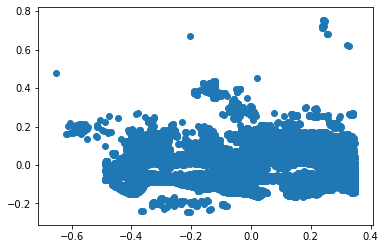

In [83]:
plt.scatter(df4.lat_norm, df4.long_norm)

In [ ]:
for i in df4.zipcode:
    if df4.zipcode[i] == [a or b or c]:
        df4.zipcode[i] = 1
    .
    .
    .

# Train Test Split and MRSE Example

In [ ]:
y = data['price']
X = data.drop(['price','date','id','zipcode'], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

In [ ]:
rmse_test = np.sqrt(mse_test)
print('Train Root Mean Squarred Error:', rmse_train)
print('Test Root Mean Squarred Error:', rmse_test)

In [ ]:
df_final = df_log

In [ ]:
predicted = cross_val_predict(linreg, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_hat_test, hist=False, color="b", label="Fitted Values" , ax=ax1)